In [2]:
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_pickle('./data/044A02上隅角_2min.mean.pkl')
data = data

In [4]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [5]:
import os,sys
sys.path.append('../xlib/src/')

In [6]:
from expriment.dataset_monitor import gen_monitor_dp
dp =  gen_monitor_dp()

Load rawdata from disk done. path=../xlib/src/xdata/../../data/044A02上隅角_2min.mean.pkl
eval feature done. start to transform to dataframe..
raw_value StaticFeature(MonitorValue) ['SensorID', 'Time']
RMean_5 RMean(StaticFeature(MonitorValue),5,args:) ['SensorID', 'Time']
RMean_15 RMean(StaticFeature(MonitorValue),15,args:) ['SensorID', 'Time']
RMean_30 RMean(StaticFeature(MonitorValue),30,args:) ['SensorID', 'Time']
RMean_60 RMean(StaticFeature(MonitorValue),60,args:) ['SensorID', 'Time']
RMax_5 RMax(StaticFeature(MonitorValue),5,args:) ['SensorID', 'Time']
RMax_15 RMax(StaticFeature(MonitorValue),15,args:) ['SensorID', 'Time']
RMax_30 RMax(StaticFeature(MonitorValue),30,args:) ['SensorID', 'Time']
RMax_60 RMax(StaticFeature(MonitorValue),60,args:) ['SensorID', 'Time']
RMin_5 RMin(StaticFeature(MonitorValue),5,args:) ['SensorID', 'Time']
RMin_15 RMin(StaticFeature(MonitorValue),15,args:) ['SensorID', 'Time']
RMin_30 RMin(StaticFeature(MonitorValue),30,args:) ['SensorID', 'Time']
RMin_60

In [7]:
train, valid, test = next(dp.next())

In [8]:
train.shape, valid.shape, test.shape

((18111, 26), (1441, 26), (721, 26))

In [6]:
ytrain = train[dp.final_label]
yvalid = valid[dp.final_label]
ytest = test[dp.final_label]

In [99]:
y = pd.concat([ytrain,yvalid,ytest]).sort_index()

In [35]:
def plot_y(ytrain,label=''):
    ytrain = ytrain[ytrain.abs()<1]
    plt.plot(ytrain.index.get_level_values(level=1), ytrain,label=label)

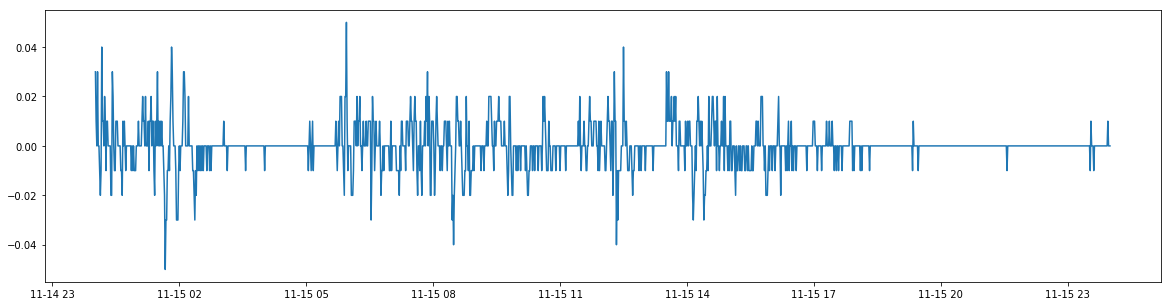

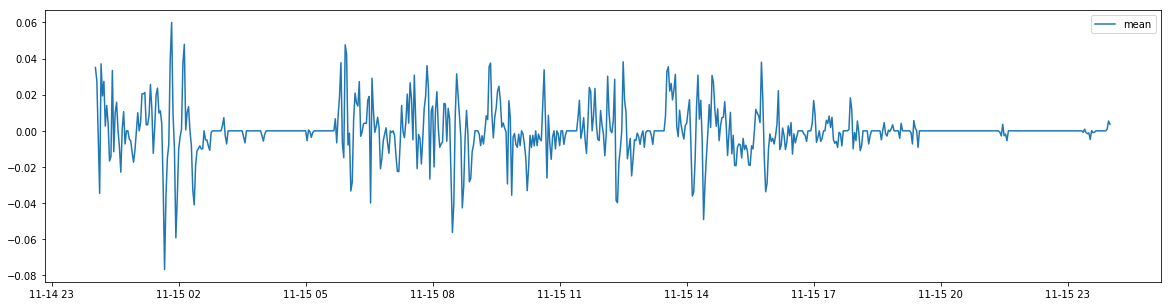

In [69]:
start = '2017-11-15 00:00:00'
end = '2017-11-16 00:00:00'
df_mean = pd.read_pickle('./data/044A02上隅角_2min.mean.pkl')
df_mean_t = df.loc(axis=0)[:,pd.Timestamp(start):pd.Timestamp(end)]
df_max = pd.read_pickle('./data/044A02上隅角.max.pkl')
df_max_t = df2.loc(axis=0)[:,pd.Timestamp(start):pd.Timestamp(end)]

y15 = ytrain.loc(axis=0)[:,pd.Timestamp('2017-11-15 00:00:00'):pd.Timestamp('2017-11-15 03:00:00')]
plt.figure(figsize=(20, 5))
plot_y(df_max_t.diff(), label='max')
plt.show()
plt.figure(figsize=(20, 5))
plot_y(df_mean_t.diff(), label='mean')
plt.legend()
plt.show()

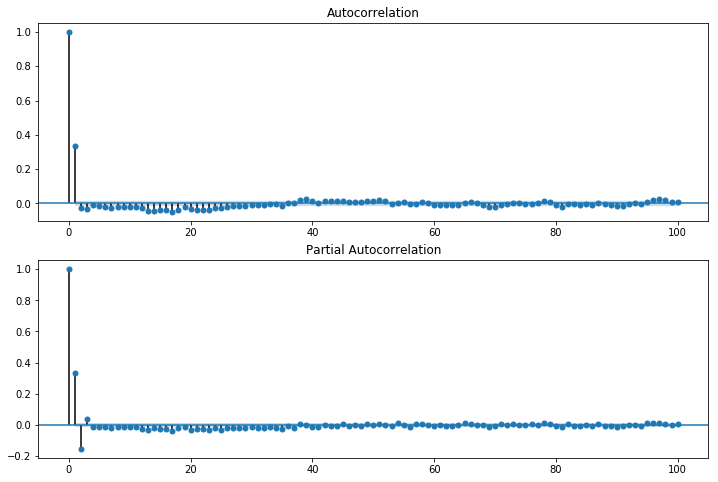

In [101]:
for i in range(1):
    i += 1
    dta = y.diff(i).iloc[i:]
#     dta = ytrain
    fig = plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta,lags=100,ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta,lags=100,ax=ax2)
#     break

In [114]:
arma_mod20 = sm.tsa.ARMA(dta,(2,3)).fit()

In [91]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
testStationarity(ytrain)

Test Statistic                -8.304868e+00
p-value                        3.928393e-13
#Lags Used                     3.500000e+01
Number of Observations Used    1.807500e+04
Critical Value (1%)           -3.430712e+00
Critical Value (5%)           -2.861700e+00
Critical Value (10%)          -2.566855e+00
dtype: float64

In [115]:
tt = arma_mod20.predict()

In [136]:
pred = pd.DataFrame()
pred['pred'] = tt
pred['label'] = ytest
# pred = pred[~pred['label'].isnull()]



In [138]:
pred['label1'] = pred['label'].shift(1)

In [140]:
pred['pred'] = pred['pred'] + pred['label1']

In [142]:
pred = pred[~pred['pred'].isnull()][['label','pred']]

In [146]:
pred = pred.reset_index()

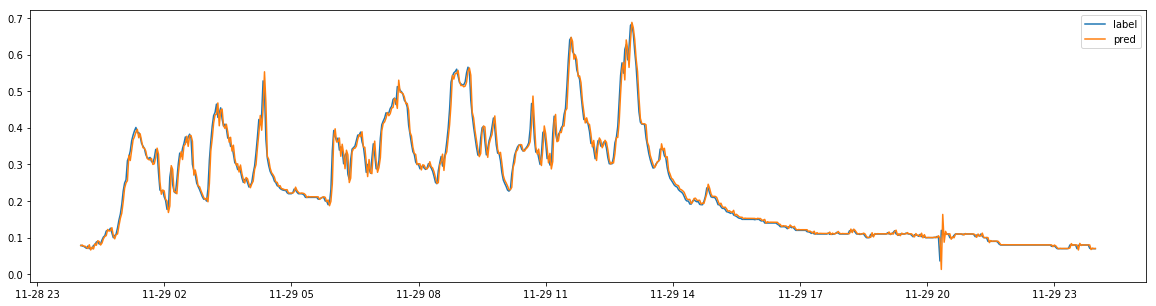

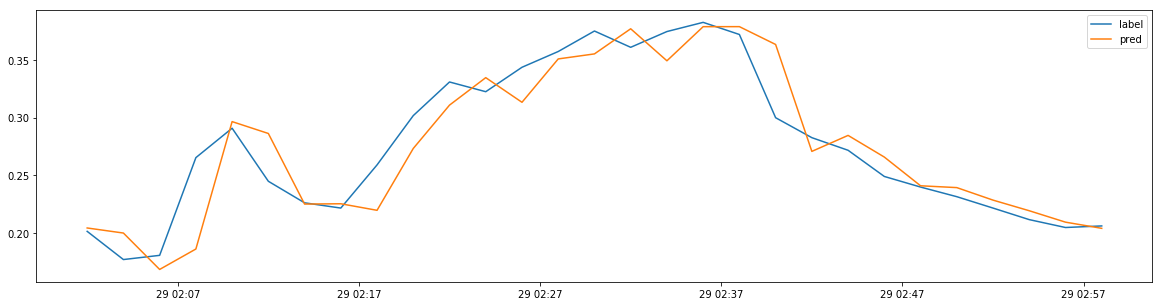

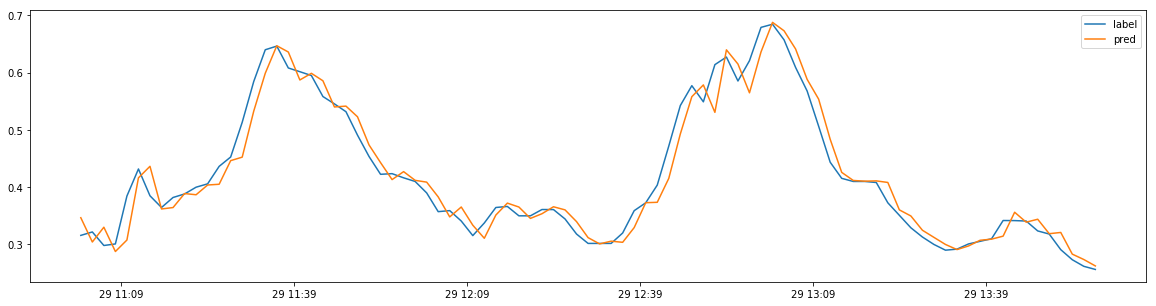

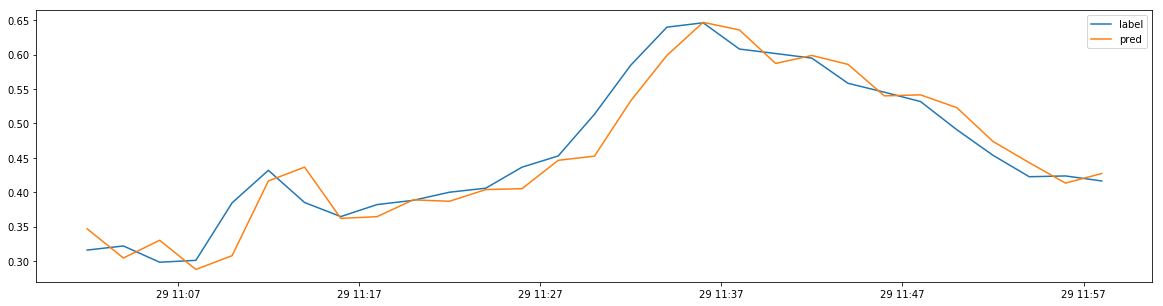

In [147]:
def plot_pred(pred, start,end):
    ttime = 'Time'
    pred = pred[(pred[ttime]>start) & (pred[ttime]<end)]
    plt.figure(figsize=(20, 5))
    plt.plot(pred['Time'], pred['label'], label='label')
    plt.plot(pred['Time'], pred['pred'], label='pred')
    plt.legend()
    plt.show()
plot_pred(pred, pd.Timestamp('2017-11-29 00:00:00'), pd.Timestamp('2017-11-30 00:00:00'))
plot_pred(pred, pd.Timestamp('2017-11-29 02:00:00'), pd.Timestamp('2017-11-29 03:00:00'))
plot_pred(pred, pd.Timestamp('2017-11-29 11:00:00'), pd.Timestamp('2017-11-29 14:00:00'))
plot_pred(pred, pd.Timestamp('2017-11-29 11:00:00'), pd.Timestamp('2017-11-29 12:00:00'))

NameError: name 'pred' is not defined

In [2]:
pred

NameError: name 'pred' is not defined